In [1]:
from bs4 import BeautifulSoup

In [2]:
html= """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""

In [4]:
soup= BeautifulSoup(html, 'lxml')

In [5]:
print(soup.prettify())

<html>
 <head>
  <title>
   test site
  </title>
 </head>
 <body>
  <p align="left" class="class1">
   test3
  </p>
  <p class="class1">
   test2
  </p>
  <p id="p1">
   오늘의 주가지수 1500
  </p>
  <span class="class3">
   span tag text
  </span>
  <p class="class4">
   test3
  </p>
 </body>
</html>



In [6]:
list(soup.children)

[<html>
 <head><title> test site </title></head>
 <body><p align="left" class="class1">test3</p>
 <p class="class1">test2</p>
 <p id="p1">오늘의 주가지수 1500</p>
 <span class="class3">span tag text</span>
 <p class="class4">test3</p>
 </body></html>,
 '\n']

In [8]:
list(soup.body.children)

[<p align="left" class="class1">test3</p>,
 '\n',
 <p class="class1">test2</p>,
 '\n',
 <p id="p1">오늘의 주가지수 1500</p>,
 '\n',
 <span class="class3">span tag text</span>,
 '\n',
 <p class="class4">test3</p>,
 '\n']

In [9]:
from urllib.request import urlopen

In [101]:
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page"
url1 = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1"
page = urlopen(url1)
soup = BeautifulSoup(page, "html.parser")
comment_all = soup.select('td.title')
comment_all

[<td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:60%">별점 - 총 10점 중</span></span><em>6</em>
 </div>
 <br/>곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('chac****', 'tbJPIN+tSVsBs4zc9GkSehBmHpW+lPy6VbJlVIFtEIU=', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '17551922', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
 </td>,
 <td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>
 <br/>이게 예술이 아니면 뭔가요? 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('froz****', 'RRgHOcUvnoruEUT/vqgz2AiFDGgVkGJvCbyBDPBt6JA=', '이게 예술이 아니면 뭔가요?', '17550850', 'point_after');" style="color:#8

In [80]:
import requests
data = requests.get('https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1')
soup = BeautifulSoup(data.text, 'html.parser')
comments = soup.select('td.title > a.report')
for comment in comments:
    print(comment["onclick"].split(",")[2])

 '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'
 '이게 예술이 아니면 뭔가요?'
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음'
 '명대사:헤이'
 '진짜 고퀄리티다.... '
 '스파이더맨 판권을 소니가 가져야 하는 이유'
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?'
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ'
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!'
 '이게 진짜 현대예술이지'


In [62]:
list(comment_all[4].children)

['\n',
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>,
 '\n',
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>,
 '\n',
 <br/>,
 '진짜 고퀄리티다.... \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t',
 <a class="report" href="#" onclick="report('tvtp****', 'w+rLH9fMcfWFHH6U11gJB1VSPQFNfyeooF4TE+mLvk8=', '진짜 고퀄리티다.... ', '17531921', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>,
 '\n']

In [74]:
temp = list(comment_all[1].children)
temp[6]

'이게 예술이 아니면 뭔가요? \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t'

In [75]:
result = temp[6].strip()
result

'이게 예술이 아니면 뭔가요?'

In [90]:
cnt = 0
comments = []
for comment in comment_all:
    temp= list(comment.children)
    if len(temp) < 5:
        cnt= cnt + 1
        continue
    else:
        try:
            cnt= cnt + 1
            result = temp[6].strip()
            comments.append(result)
        except:
            print("error cnt count", cnt)
comments

['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ',
 '이게 예술이 아니면 뭔가요?',
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음',
 '명대사:헤이',
 '진짜 고퀄리티다....',
 '스파이더맨 판권을 소니가 가져야 하는 이유',
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?',
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ',
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!',
 '이게 진짜 현대예술이지']

In [88]:
import requests
data = requests.get('https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1')
soup = BeautifulSoup(data.text, 'html.parser')
comment2 = soup.select('td.title ')
comment2
#old_content > table > tbody > tr:nth-child(1) > td.title > a.movie.color_b

[<td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:60%">별점 - 총 10점 중</span></span><em>6</em>
 </div>
 <br/>곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('chac****', 'gIZ0sFP+UeXX5bgPEUsiBxPwQdwffyy59CiJ0aDY9i4=', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '17551922', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
 </td>,
 <td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>
 <br/>이게 예술이 아니면 뭔가요? 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="#" onclick="report('froz****', 'begE4i829xuM+6BiSGPb9z84fFn6Ts1cVs1LgHivcfY=', '이게 예술이 아니면 뭔가요?', '17550850', 'point_after');" style="color:#8

In [97]:
comments = [ ]
cont = 0
for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    
    comment_all = soup.find_all('td', class_='title')
    for comment in comment_all:
        temp= list(comment.children)
        if len(temp) < 5:
            cnt= cnt + 1
            continue
        else:
            try:
                cnt= cnt + 1
                result = temp[6].strip()
                comments.append(result)
            except:
                print("error cnt count", cnt)
print(len(comments))
print(comments)

70
['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 

In [98]:
import pandas as pd

In [99]:
dict_doc = {'text' : comments}
doc = pd.DataFrame(dict_doc)

In [100]:
doc.to_csv("스파이더맨리뷰.csv", index = False)

In [102]:
import requests
data = requests.get('https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1')
soup = BeautifulSoup(data.text, 'html.parser')
comments = soup.select('td.title > a.report')
for comment in comments:
    print(comment["onclick"].split(",")[2])

 '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'
 '이게 예술이 아니면 뭔가요?'
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음'
 '명대사:헤이'
 '진짜 고퀄리티다.... '
 '스파이더맨 판권을 소니가 가져야 하는 이유'
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?'
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ'
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!'
 '이게 진짜 현대예술이지'


In [104]:
comments = [ ]
cont = 0
for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    
    comment_all = soup.select('td.title > a.report')
    for comment in comment_all:
        result=comment["onclick"].split(",")[2]
        comments.append(result)
print(len(comments))
print(comments)

70
[" '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'", " '이게 예술이 아니면 뭔가요?'", " '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음'", " '명대사:헤이'", " '진짜 고퀄리티다.... '", " '스파이더맨 판권을 소니가 가져야 하는 이유'", " '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?'", " '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ'", " '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!'", " '이게 진짜 현대예술이지'", " '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'", " '이게 예술이 아니면 뭔가요?'", " '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음'", " '명대사:헤이'", " '진짜 고퀄리티다.... '", " '스파이더맨 판권을 소니가 가져야 하는 이유'", " '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?'", " '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ'", " '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!'", " '이게 진짜 현대예술이지'", " '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'", " '이게 예술이 아니면 뭔가요?'", " '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음'", " '명대사:헤이'", " '진짜 고퀄

In [128]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [124]:
f = open('스파이더맨리뷰.csv', encoding='utf-8')
text = f.read()
f.close()

In [130]:
from matplotlib import rc


(-0.5, 399.5, 199.5, -0.5)

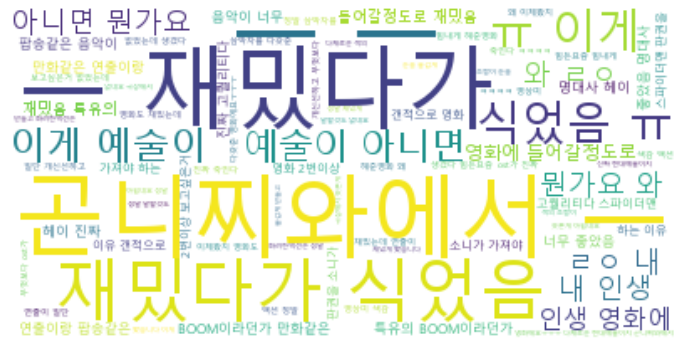

In [132]:
wcloud = WordCloud('c:/windows/fonts/malgun.ttf',background_color='white' ,max_words=1000, relative_scaling = 0.2).generate(text)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")